In [43]:
import numpy as np
import pandas as pd
import os
import scipy.spatial
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
import csv

In [79]:
class PCA:
    def __init__(self):
        self.n = 10
        self.delta = None
    
    def train(self,XTrain):
        XTrain =  np.transpose(XTrain)
        mean = []
        for i in range(XTrain.shape[0]):
            sum = 0.0
            for j in range(XTrain.shape[1]):
                sum = sum + XTrain[i][j]
            mean.append(sum/XTrain.shape[1])

        # Normalize XTrain
        A = np.zeros_like(XTrain,dtype=float)
        for i in range(XTrain.shape[0]):
            for j in range(XTrain.shape[1]):
                A[i][j] = XTrain[i][j] - mean[i]
        # Run SVD
        u, s, vh = np.linalg.svd(A, full_matrices=False)

        # Eigen Vector and Eigen Values
        eigenValues = []
        for i in range(s.shape[0]):
            eigenValues.append((s[i]*s[i])/XTrain.shape[1])
            print("Eigen Value {:d} = {:.4f}".format(i+1,eigenValues[i]))
            print("Eigen Vector {:d} = ".format(i+1))
            print(u[:,i])
        self.delta = np.matmul(np.transpose(u),A)
        return u,mean
    
    def score(self,XTest,u,mean):
        # ## Normalize Test samples
        XTest =  np.transpose(XTest)
        # Normalize XTest
        Y = np.zeros_like(XTest,dtype=float)
        for i in range(XTest.shape[0]):
            for j in range(XTest.shape[1]):
                Y[i][j] = XTest[i][j] - mean[i]
        # ## Distance From Each column in Delta matrix - MALWARE MODEL
        finalDIST=[]
        for i in range(Y.shape[1]):
            WY0 = np.matmul(np.transpose(u),Y[:,i])
            eDist = []
            for i in range(self.delta.shape[1]):
                eDist.append(scipy.spatial.distance.euclidean(WY0,self.delta[:,i]))    
            finalDIST.append(min(eDist))
        return finalDIST
    
def dumpFile(fname, x1,x2,yPred):   
    results = [x1,x2,yPred]
    f = open(fname, 'a+')
    wr = csv.writer(f, dialect='excel')
    #s = str(x1)+',' + str(x2)+',' +str(yPred)      
    wr.writerow(results)
        
def dumpForPR(fname,YTest,distMalware):
    f = open(fname, 'a+')
    wr = csv.writer(f, dialect='excel')
    for i in range(len(distMalware)): 
        results = [YTest[i],distMalware[i]]
        #s = str(YTest[i])+',' + str(distMalware[i])
        wr.writerow(results)
    
def ResultScatter(XTest,YTest,distMalware,distBenign):
    YPredicted=[]
    markers = ["s" , "o" ]    # s== malware=1 ; o == benign=0
    for i in range(YTest.shape[0]):
        if(YTest[i]=="m"):
            markSymbol = "s"
        else:
            markSymbol = "o"
        if distMalware[i]<=distBenign[i]:
            plt.scatter(XTest[i][0], XTest[i][1], marker=markSymbol, c='red')      # is predicted Malware
            YPredicted.append(1)
            dumpFile("PCA-40.txt",XTest[i][0], XTest[i][1],1)
        else:
            plt.scatter(XTest[i][0], XTest[i][1], marker=markSymbol, c='green')    # is predicted Benign
            YPredicted.append(0)
            dumpFile("PCA-40.txt",XTest[i][0], XTest[i][1],0)
    plt.show()
    return YPredicted

def PRCurve(YTest,distMalware):
    # ## PR curve 
    precision, recall, thresholds = precision_recall_curve(YTest, distMalware)
    average_precision = average_precision_score(YTest, distMalware)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve:{0:0.2f}'.format(
              average_precision))

Eigen Value 1 = 18.9729
Eigen Vector 1 = 
[-0.99999475  0.00323978]
Eigen Value 2 = 0.3386
Eigen Vector 2 = 
[0.00323978 0.99999475]
Eigen Value 1 = 10.4916
Eigen Vector 1 = 
[0.01615853 0.99986944]
Eigen Value 2 = 1.5440
Eigen Vector 2 = 
[ 0.99986944 -0.01615853]


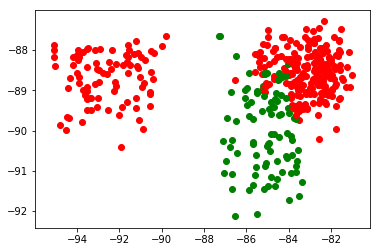

Eigen Value 1 = 96.9073
Eigen Vector 1 = 
[-0.01811857  0.99983585]
Eigen Value 2 = 13.6718
Eigen Vector 2 = 
[0.99983585 0.01811857]
Eigen Value 1 = 21.8135
Eigen Vector 1 = 
[-0.99522327 -0.09762499]
Eigen Value 2 = 4.0174
Eigen Vector 2 = 
[-0.09762499  0.99522327]


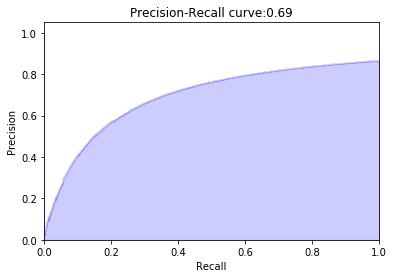

Eigen Value 1 = 39.2384
Eigen Vector 1 = 
[-0.99967572  0.02546463]
Eigen Value 2 = 28.3481
Eigen Vector 2 = 
[0.02546463 0.99967572]
Eigen Value 1 = 23.1824
Eigen Vector 1 = 
[-0.91843012  0.39558327]
Eigen Value 2 = 19.0665
Eigen Vector 2 = 
[0.39558327 0.91843012]


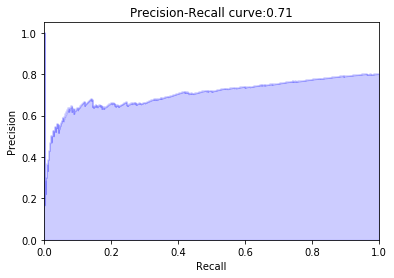

Eigen Value 1 = 556.1134
Eigen Vector 1 = 
[-0.9999982  0.001895 ]
Eigen Value 2 = 171.6993
Eigen Vector 2 = 
[0.001895  0.9999982]
Eigen Value 1 = 385.3584
Eigen Vector 1 = 
[-0.98065257  0.19575631]
Eigen Value 2 = 343.9905
Eigen Vector 2 = 
[0.19575631 0.98065257]


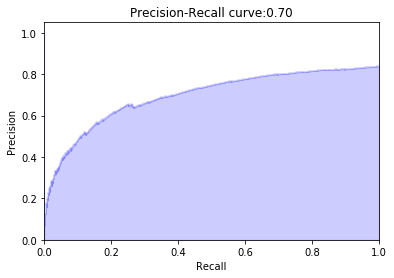

Eigen Value 1 = 3.3489
Eigen Vector 1 = 
[0.09296455 0.99566942]
Eigen Value 2 = 1.1785
Eigen Vector 2 = 
[ 0.99566942 -0.09296455]
Eigen Value 1 = 1.0279
Eigen Vector 1 = 
[-0.98699098 -0.16077563]
Eigen Value 2 = 0.2775
Eigen Vector 2 = 
[-0.16077563  0.98699098]


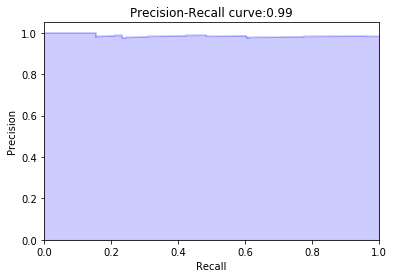

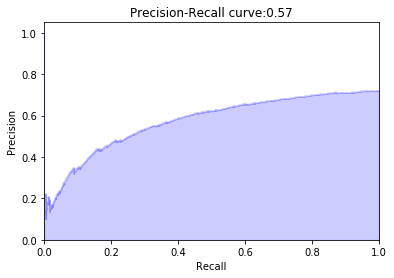

In [80]:
for j in range(1,6):   
    
    ##########TEST DATA###########
    foldTestPath = "PATH_DATA/path-5-fold/path40/path.test%d.txt" %(j)
    foldTestUA = "UA_DATA/ua-5-fold/ua40/ua.test%d.txt" %(j)
    dfTestPath = pd.DataFrame(data=pd.read_csv(foldTestPath,header=None))
    dfTestUA = pd.DataFrame(data=pd.read_csv(foldTestUA,header=None))
    dfTestPath = dfTestPath.reset_index(drop=True)
    dfTestUA = dfTestUA.reset_index(drop=True)
    dfTestPath = dfTestPath.replace([np.inf], pathTrainUA.max()+1)
    dfTestPath = dfTestPath.replace([-np.inf], pathTrainUA.min()-1)    
    dfTestUA = dfTestUA.replace([np.inf], pathTrainUA.max()+1)
    dfTestUA = dfTestUA.replace([-np.inf], pathTrainUA.min()-1)
    
    A1 = dfTestPath.values
    A2 = dfTestUA.values
    B = np.hstack((A1,A2))
    XTest = B
    YTest = XTest[:,0]
    XTest = np.delete(XTest, [0,2], axis=1)

    samplesLabel = {'m': 1,'b': 0} 
    YTest = np.array([samplesLabel[item] for item in YTest])
    
    #Malware PCA Model
    
    ##########TRAIN DATA###########
    foldTrainPath = "PATH_DATA/path-5-fold/path40/path.train%d.txt" %(j)
    foldTrainUA = "UA_DATA/ua-5-fold/ua40/ua.train%d.txt" %(j)
    pathTrainPath = pd.DataFrame(data=pd.read_csv(foldTrainPath,header=None))   
    pathTrainPath = pathTrainPath.replace([np.inf], pathTrainUA.max()+1)
    pathTrainPath = pathTrainPath.replace([-np.inf], pathTrainUA.min()-1)
    pathTrainUA = pd.DataFrame(data=pd.read_csv(foldTrainUA,header=None))
    pathTrainUA = pathTrainUA.replace([np.inf], pathTrainUA.max()+1)
    pathTrainUA = pathTrainUA.replace([-np.inf], pathTrainUA.min()-1)
    dfTrPth = pathTrainPath[pathTrainPath[0] == 'm']
    dfTrUA = pathTrainUA[pathTrainUA[0] == 'm']
    A1 = dfTrPth.values
    A2 = dfTrUA.values
    B = np.hstack((A1,A2))
    B = np.delete(B, [0,2], axis=1)
    XTrain = B
    
    ## PCA Code
    pcaMalware = PCA()
    uMal,meanMal = pcaMalware.train(XTrain)
    distMalware = pcaMalware.score(XTest,uMal,meanMal)
    
    ### Benign PCA MODEL
    
    ##########TRAIN DATA###########
    pathTrainPathBenign = pd.DataFrame(data=pd.read_csv(foldTrainPath,header=None))
    pathTrainUABenign = pd.DataFrame(data=pd.read_csv(foldTrainUA,header=None))
    pathTrainUABenign = pathTrainUABenign.replace([np.inf], pathTrainUA.max()+1)
    pathTrainUABenign = pathTrainUABenign.replace([-np.inf], pathTrainUA.min()-1)
    pathTrainPathBenign = pathTrainPathBenign.replace([np.inf], pathTrainUA.max()+1)
    pathTrainPathBenign = pathTrainPathBenign.replace([-np.inf], pathTrainUA.min()-1)        
    dfTrPthBenign = pathTrainPathBenign[pathTrainPathBenign[0] == 'b']
    dfTrUABenign = pathTrainUABenign[pathTrainUABenign[0] == 'b']
    A1Ben = dfTrPthBenign.values
    A2Ben = dfTrUABenign.values
    BBen = np.hstack((A1Ben,A2Ben))
    BBen = np.delete(BBen, [0,2], axis=1)
    XTrainBen = BBen
    
    ## PCA Code
    pcaBenign = PCA()
    uBen,meanBen = pcaBenign.train(XTrainBen)
    distBenign = pcaBenign.score(XTest,uBen,meanBen)
    
    ## Results for each fold
    ResultScatter(XTest,YTest,distMalware,distBenign)
    PRCurve(YTest,distMalware)
    dumpForPR("PRCurve-40",YTest,distMalware)

In [87]:
def ResultScatterAllFolds():
    dfResultScatter = pd.DataFrame(data=pd.read_csv("PCA-30.txt",header=None))
    scatterNP = dfResultScatter.values
    for i in range(dfResultScatter.shape[0]):
        if(scatterNP[i][2]==1):
            plt.scatter(scatterNP[i][0], scatterNP[i][1], c='red')      # is predicted Malware
        else:
            plt.scatter(scatterNP[i][0], scatterNP[i][1], c='green')    # is predicted Benign
    plt.show()

In [122]:
def PRCurveAllFolds():
    # ## PR curve 
    dfResultPR = pd.DataFrame(data=pd.read_csv("PRCurve-10",header=None))
    precision, recall, thresholds = precision_recall_curve(dfResultPR.values[:,0], dfResultPR.values[:,1])
    dfResultPR2 = pd.DataFrame(data=pd.read_csv("PRCurve-20",header=None))
    precision2, recall2, thresholds2 = precision_recall_curve(dfResultPR2.values[:,0], dfResultPR2.values[:,1])
    dfResultPR3 = pd.DataFrame(data=pd.read_csv("PRCurve-30",header=None))
    precision3, recall3, thresholds3 = precision_recall_curve(dfResultPR3.values[:,0], dfResultPR3.values[:,1])
    dfResultPR4 = pd.DataFrame(data=pd.read_csv("PRCurve-40",header=None))
    precision4, recall4, thresholds4 = precision_recall_curve(dfResultPR4.values[:,0], dfResultPR4.values[:,1])
    plt.plot(recall,precision, label="seqLen=10; AUC = %.4f"%(-np.trapz(precision,recall)))
    plt.plot(recall2,precision2, label="seqLen=20; AUC = %.4f"%(-np.trapz(precision2,recall2)))
    plt.plot(recall3,precision3, label="seqLen=30; AUC = %.4f"%(-np.trapz(precision3,recall3)))
    plt.plot(recall4,precision4, label="seqLen=40; AUC = %.4f"%(-np.trapz(precision4,recall4)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.show() 

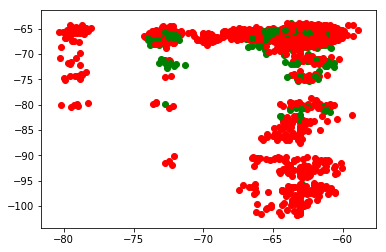

In [88]:
ResultScatterAllFolds()

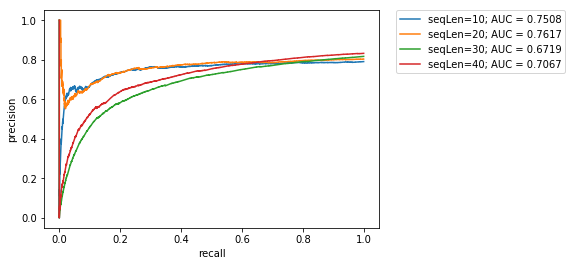

In [123]:
PRCurveAllFolds()